Train MSE: 0.2319 | Test MSE: 0.2399
Train RMSE: 0.4815 | Test RMSE: 0.4898
Train MAE: 0.3885 | Test MAE: 0.3522
Train R2 Score: 0.8308 | Test R2 Score: 0.7953
Train MAPE: 6.01% | Test MAPE: 5.32%


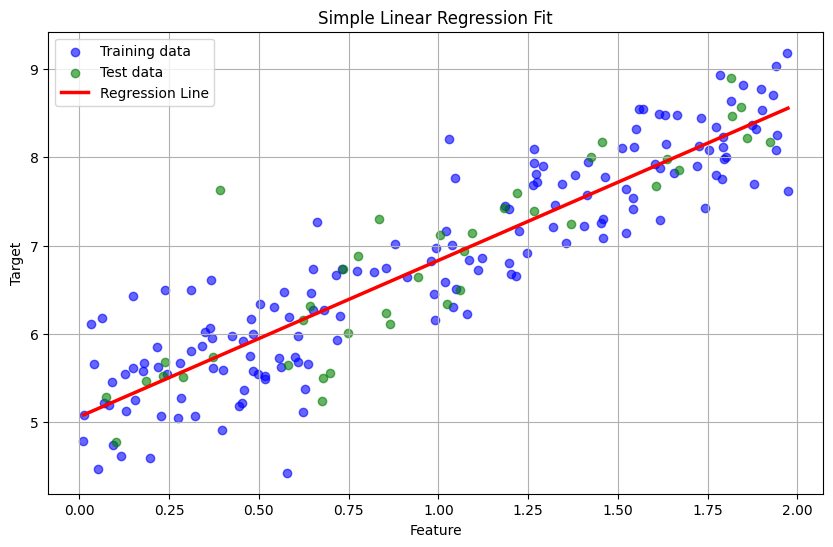

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(200, 1)
y = 5 + 1.8 * X + np.random.randn(200, 1) * 0.5

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
split_index = int(0.8 * len(X))
train_idx, test_idx = indices[:split_index], indices[split_index:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    u = np.sum((y_true - y_pred) ** 2)
    v = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (u / v)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mse = mse(y_train, y_train_pred)
test_mse = mse(y_test, y_test_pred)

train_rmse = rmse(y_train, y_train_pred)
test_rmse = rmse(y_test, y_test_pred)

train_mae = mae(y_train, y_train_pred)
test_mae = mae(y_test, y_test_pred)

train_r2 = r2(y_train, y_train_pred)
test_r2 = r2(y_test, y_test_pred)

train_mape = mape(y_train, y_train_pred)
test_mape = mape(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
print(f"Train R2 Score: {train_r2:.4f} | Test R2 Score: {test_r2:.4f}")
print(f"Train MAPE: {train_mape:.2f}% | Test MAPE: {test_mape:.2f}%")

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test data')
plt.plot(X_line, y_line, color='red', linewidth=2.5, label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
